<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#0336FF;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">EDA of Udemy Courses</p>
</div>


### **Import Necessary Libraries:**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import plotly_express as px

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#0336FF;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">DataSet</p>
</div>


**Importing dataset and converting xlsx into readable form**

In [2]:
path = ('../input/udemy-courses-dataset/udemy1.xlsx')
xl = pd.ExcelFile(path)
print(xl.sheet_names)

['Sheet1']


In [3]:
df = xl.parse('Sheet1')

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#0336FF;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">Getting Overview</p>
</div>


### **How big is the data?**

In [4]:
df.shape

(466, 13)

### **How does the data look like?**

In [5]:
df.sample(5)
# i prefer "sample()" instead of "head()" because it shows random values of your data.

,category,title,short_decs,rating,student_num,points,creator,language,last_update,price,duration,long_desc,url
281,IT & Software > IT Certifications > Amazon AWS,AWS Certified Solutions Architect Associate Pr...,"With Comprehensive Practice Exams, Quizzes, an...",4.5,152 students,31,Tek Smart Learning,English,Last updated 7/2018,$14.99,2 hours on-demand video,This course provides comprehensive preparation...,https://www.udemy.com/course/ultimate-prep-gui...
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.udemy.com/course/de-0-connaissance...
153,IT & Software > IT Certifications > AWS Certif...,AWS Certified Cloud Practitioner,Beginner to Advanced,0.0,0 students,0,Mohamed Boufalah,English,Last updated 1/2022,$14.99,NaN,Our AWS Certified Cloud Practitioner 2022 cour...,https://www.udemy.com/course/aws-certified-clo...
25,IT & Software > IT Certifications > AWS Certif...,Certificação AWS Solutions Architect -Simulado...,Treine para a prova com 4 simulados completos ...,4.7,"1,595 students",58,Rafael Antonio Alves,Portuguese,Last updated 7/2022,$14.99,NaN,Conquiste uma das Certificações mais valorizad...,https://www.udemy.com/course/certificacao-aws-...
121,IT & Software > IT Certifications > AWS Certif...,(SAA-C02) AWS Certified Solutions Architect - ...,This course is made for every one who want to ...,0.0,4 students,0,Datta Jagtap,English,Last updated 5/2021,$14.99,NaN,The AWS Certified Solutions Architect - Associ...,https://www.udemy.com/course/saa-c02-aws-certi...


**Some important Informations about the DataFrame. Like:**
### **What is the data type of columns?**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     462 non-null    object 
 1   title        465 non-null    object 
 2   short_decs   462 non-null    object 
 3   rating       449 non-null    float64
 4   student_num  449 non-null    object 
 5   points       449 non-null    object 
 6   creator      462 non-null    object 
 7   language     462 non-null    object 
 8   last_update  443 non-null    object 
 9   price        430 non-null    object 
 10  duration     152 non-null    object 
 11  long_desc    452 non-null    object 
 12  url          466 non-null    object 
dtypes: float64(1), object(12)
memory usage: 47.5+ KB


### **Are there any missing values?**

In [7]:
df.isnull().sum()

category         4
title            1
short_decs       4
rating          17
student_num     17
points          17
creator          4
language         4
last_update     23
price           36
duration       314
long_desc       14
url              0
dtype: int64

**Some basic statistical summary of the Quantative Series:**
### **How does the data look mathematically?**

In [8]:
df.describe()

,rating
count,449.000000
mean,2.997773
std,1.983930
min,0.000000
25%,0.000000
50%,4.000000
75%,4.600000
max,5.000000


## **Are there any duplicate values?**

In [9]:
df.duplicated().sum()

7

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#0336FF;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">Univariate Analysis</p>
</div>


> Means Analysis with a single Variable 

# **Numerical Data**

### **Histogram**

In [10]:
fig = px.histogram(df, x=df['rating'],title='Course Rating Histogram',labels={"rating": "Course Rating"})
fig.update_layout(font_family="Courier New",
    font_size=16, 
    font_color="black",
    title_font_size=22,              
    title={'y':0.9,'x':0.5})
fig.show()

# **Categorical Data**

**Lets find out:**
### **Which category or niche has maximum courses?**

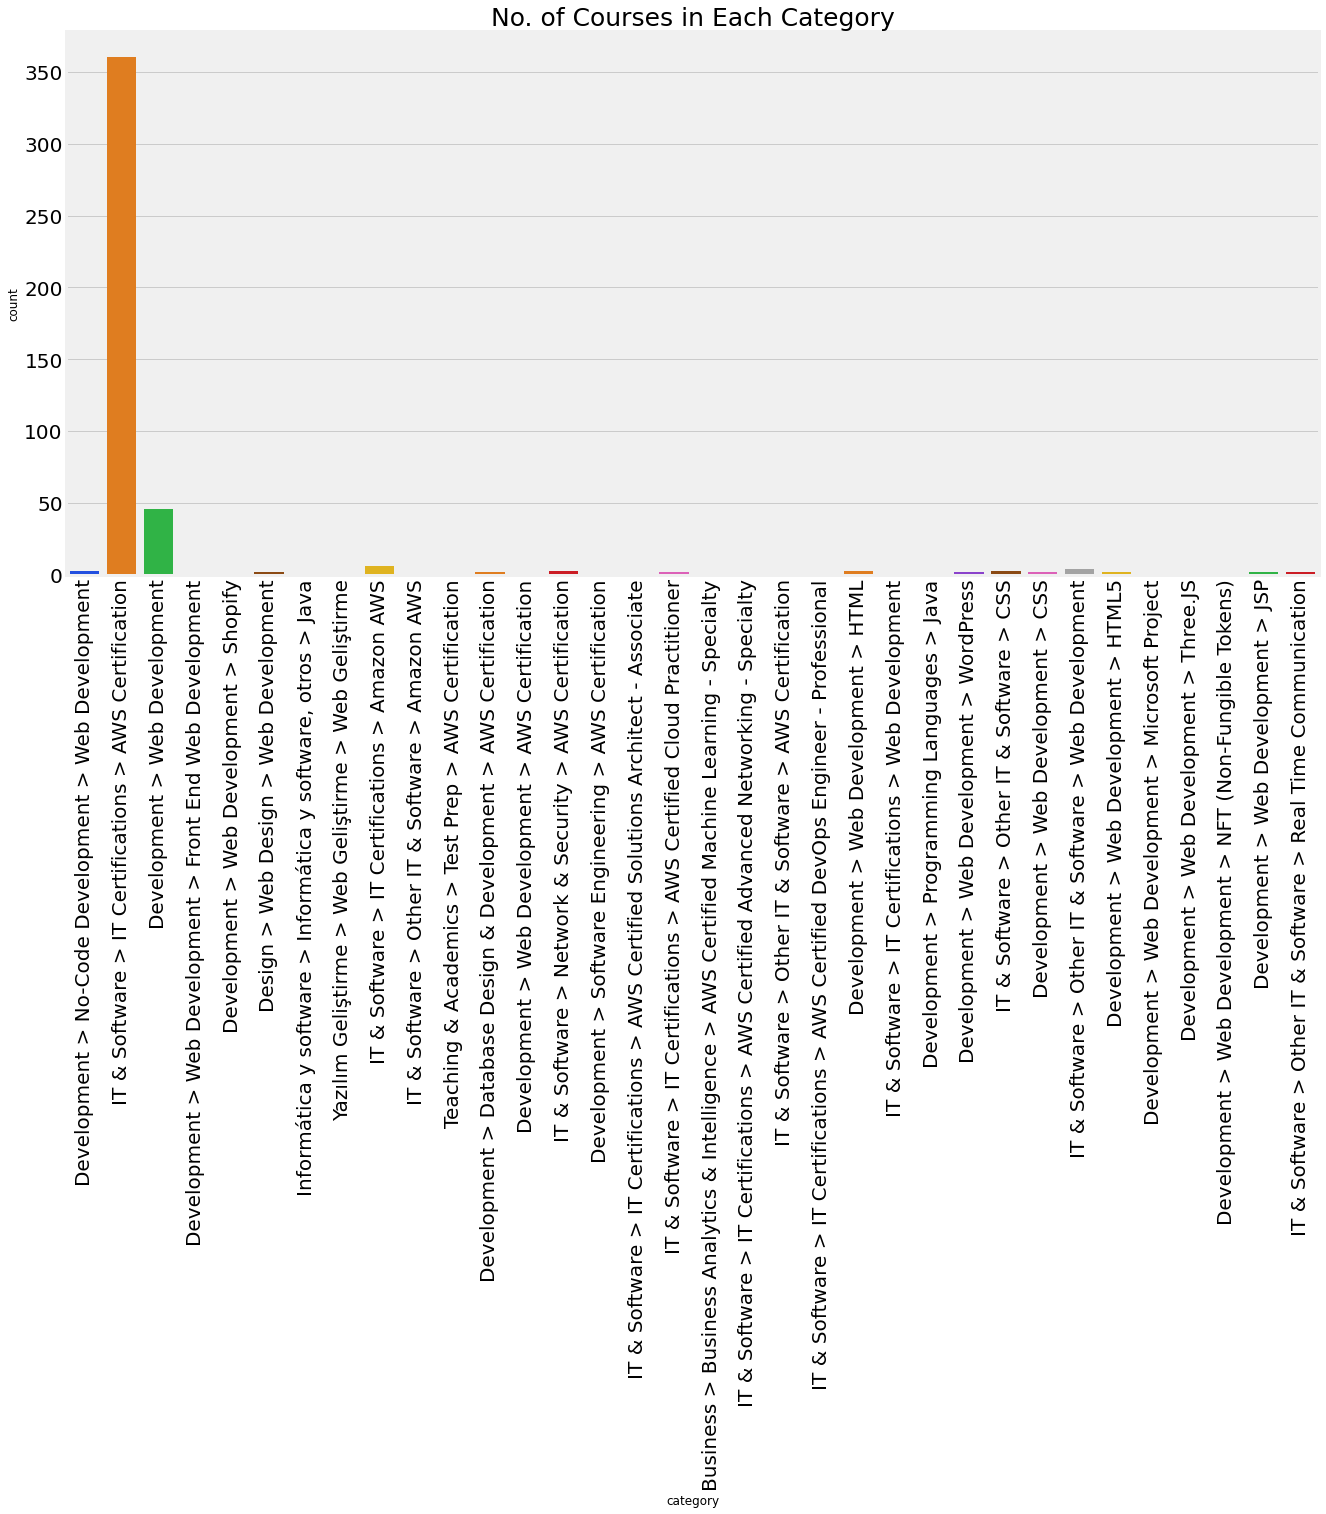

In [11]:
plt.figure(figsize=(20, 10))
sns.countplot(df['category'], palette= 'bright')
plt.xticks(rotation='vertical', fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("No. of Courses in Each Category",fontsize=25)
plt.show()

From the above chart and graph we can conclude that category:"AWS Certification" has maximum courses.

**Now:**
### **Which is the most common Language in the courses?**

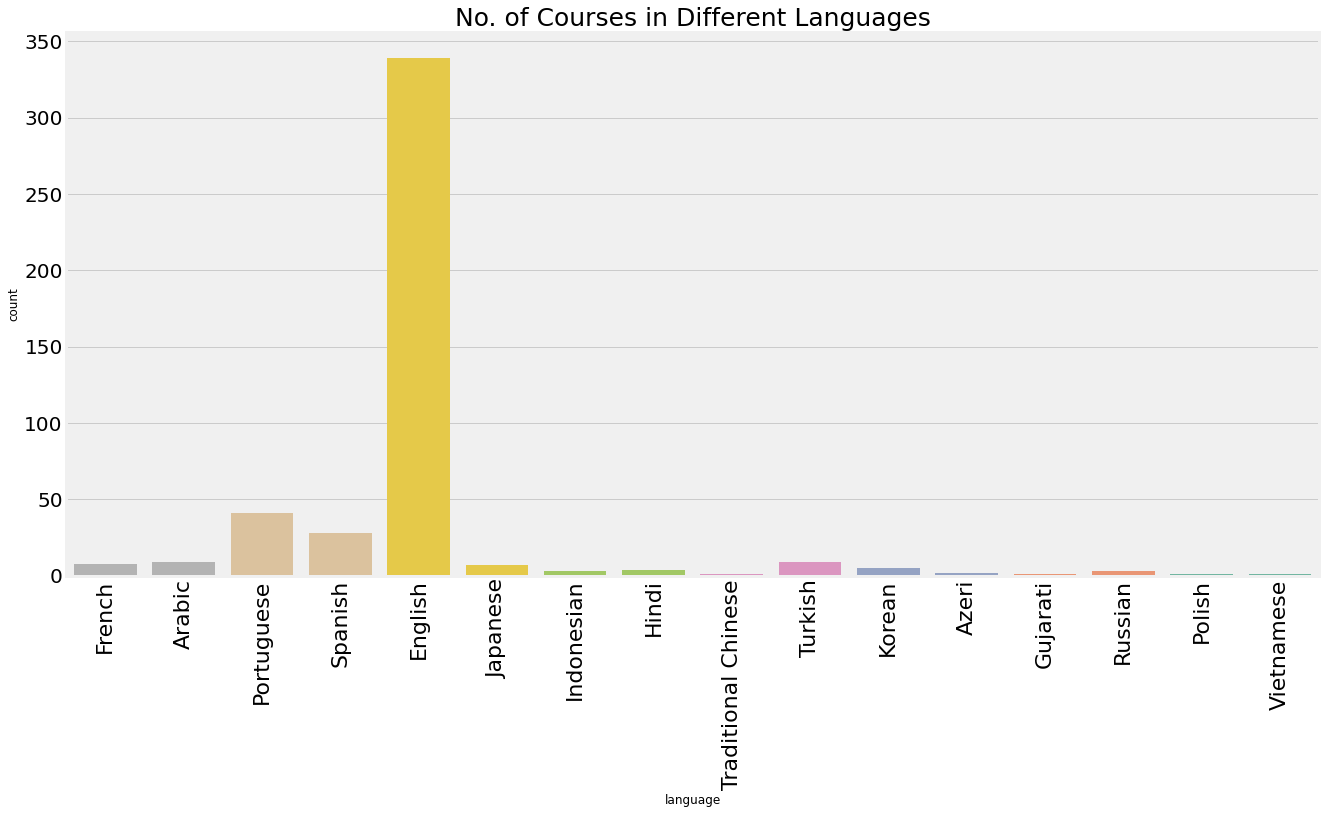

In [12]:
plt.figure(figsize=(20, 10))
sns.countplot(df['language'], palette = "Set2_r")
plt.xticks(rotation='vertical', fontsize = 22)
plt.yticks(fontsize = 20)
plt.title("No. of Courses in Different Languages",fontsize=25)
plt.show()

So, it is clear that English is the most common Language in which the curriculum is built.

**Now, Lets find out:**
### **What is the most common price for courses?**

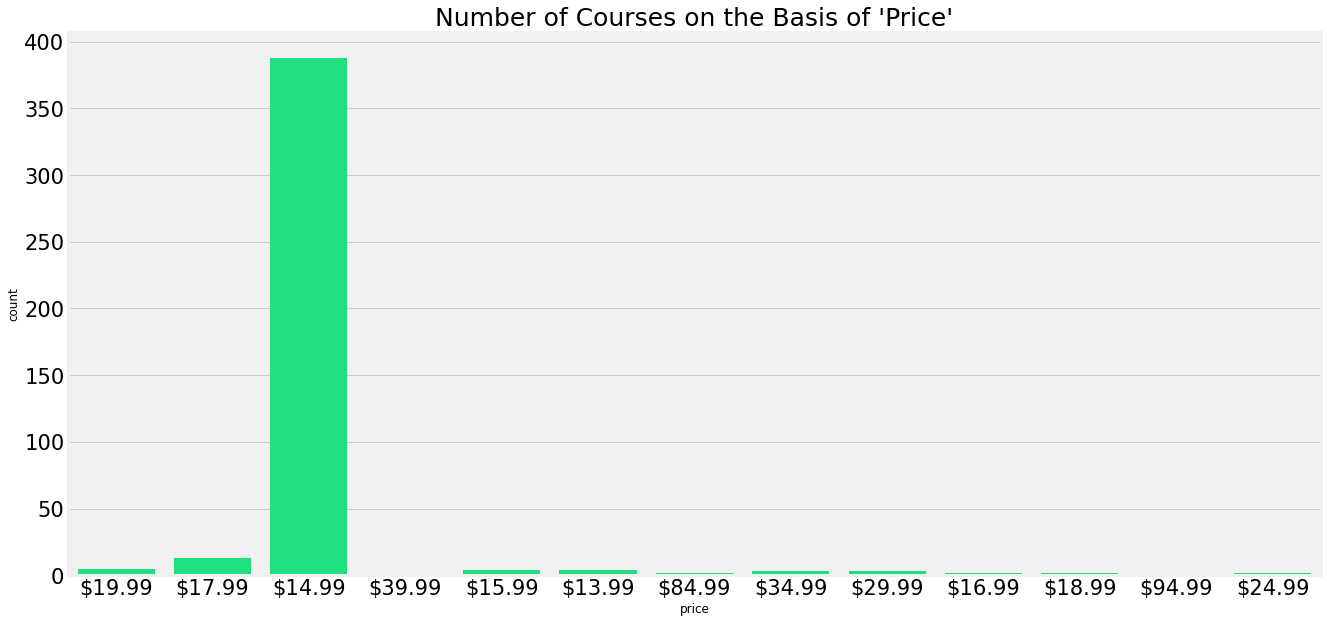

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(df['price'], color= 'springgreen')
plt.xticks(fontsize = 21)
plt.yticks(fontsize = 21)
plt.title("Number of Courses on the Basis of 'Price'",fontsize=25)
plt.show()

**And:**
### **Most common 'Duration' of video of the courses:**

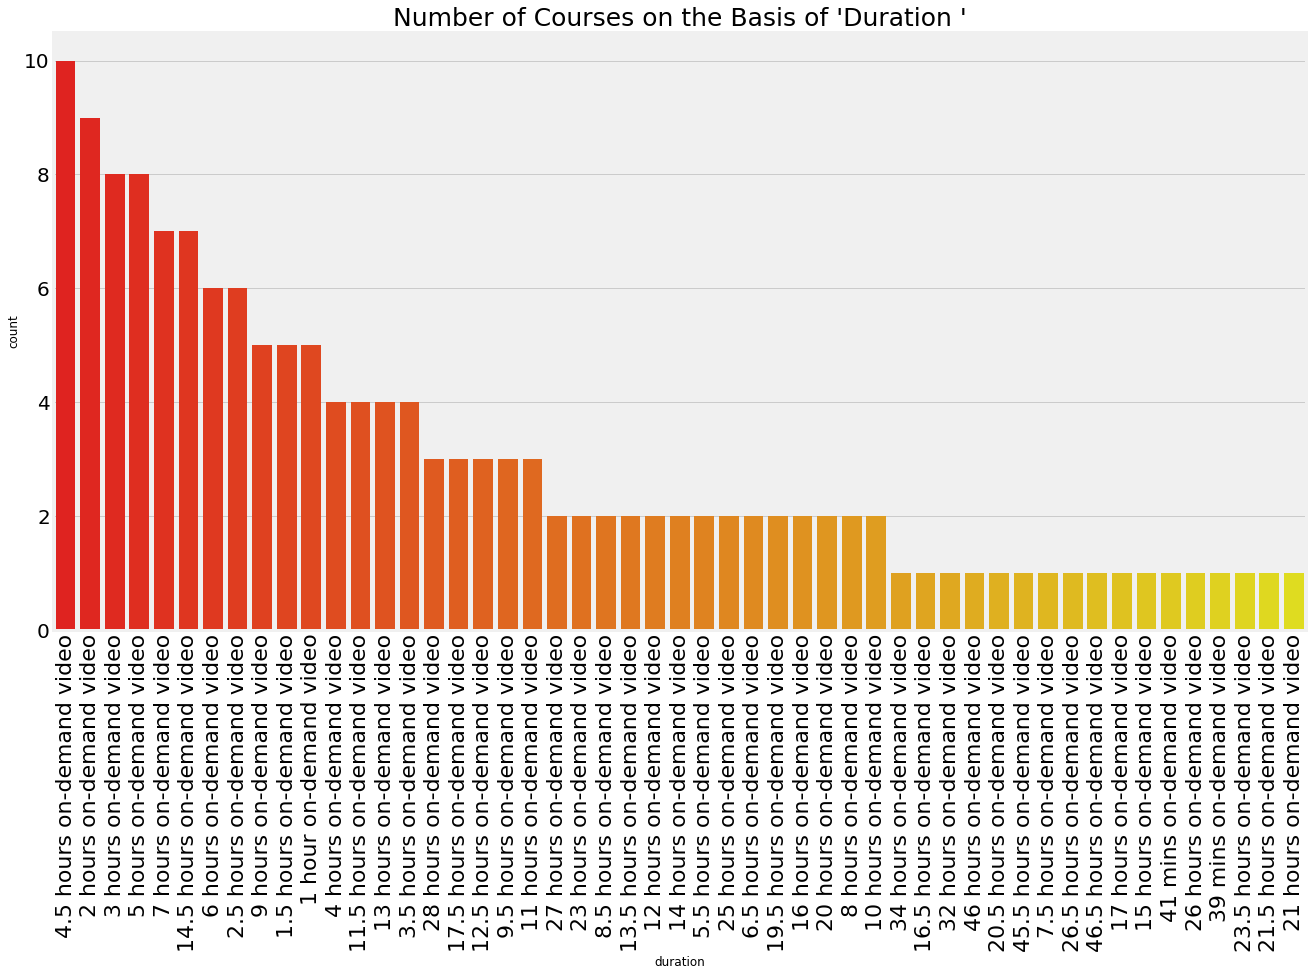

In [14]:
plt.figure(figsize=(20, 11))
sns.countplot(x = 'duration', data = df, order = df['duration'].value_counts().index, palette ="autumn")
plt.xticks(rotation='vertical', fontsize = 22)
plt.yticks(fontsize = 20)
plt.title("Number of Courses on the Basis of 'Duration '",fontsize=25)
plt.show()

Courses vary greatly depending on the duration of the video. But 4.5 hours is the most common duration of video.

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#0336FF;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">Multivariate Analysis</p>
</div>


#### **Finding out relation between course Category and Rating:**

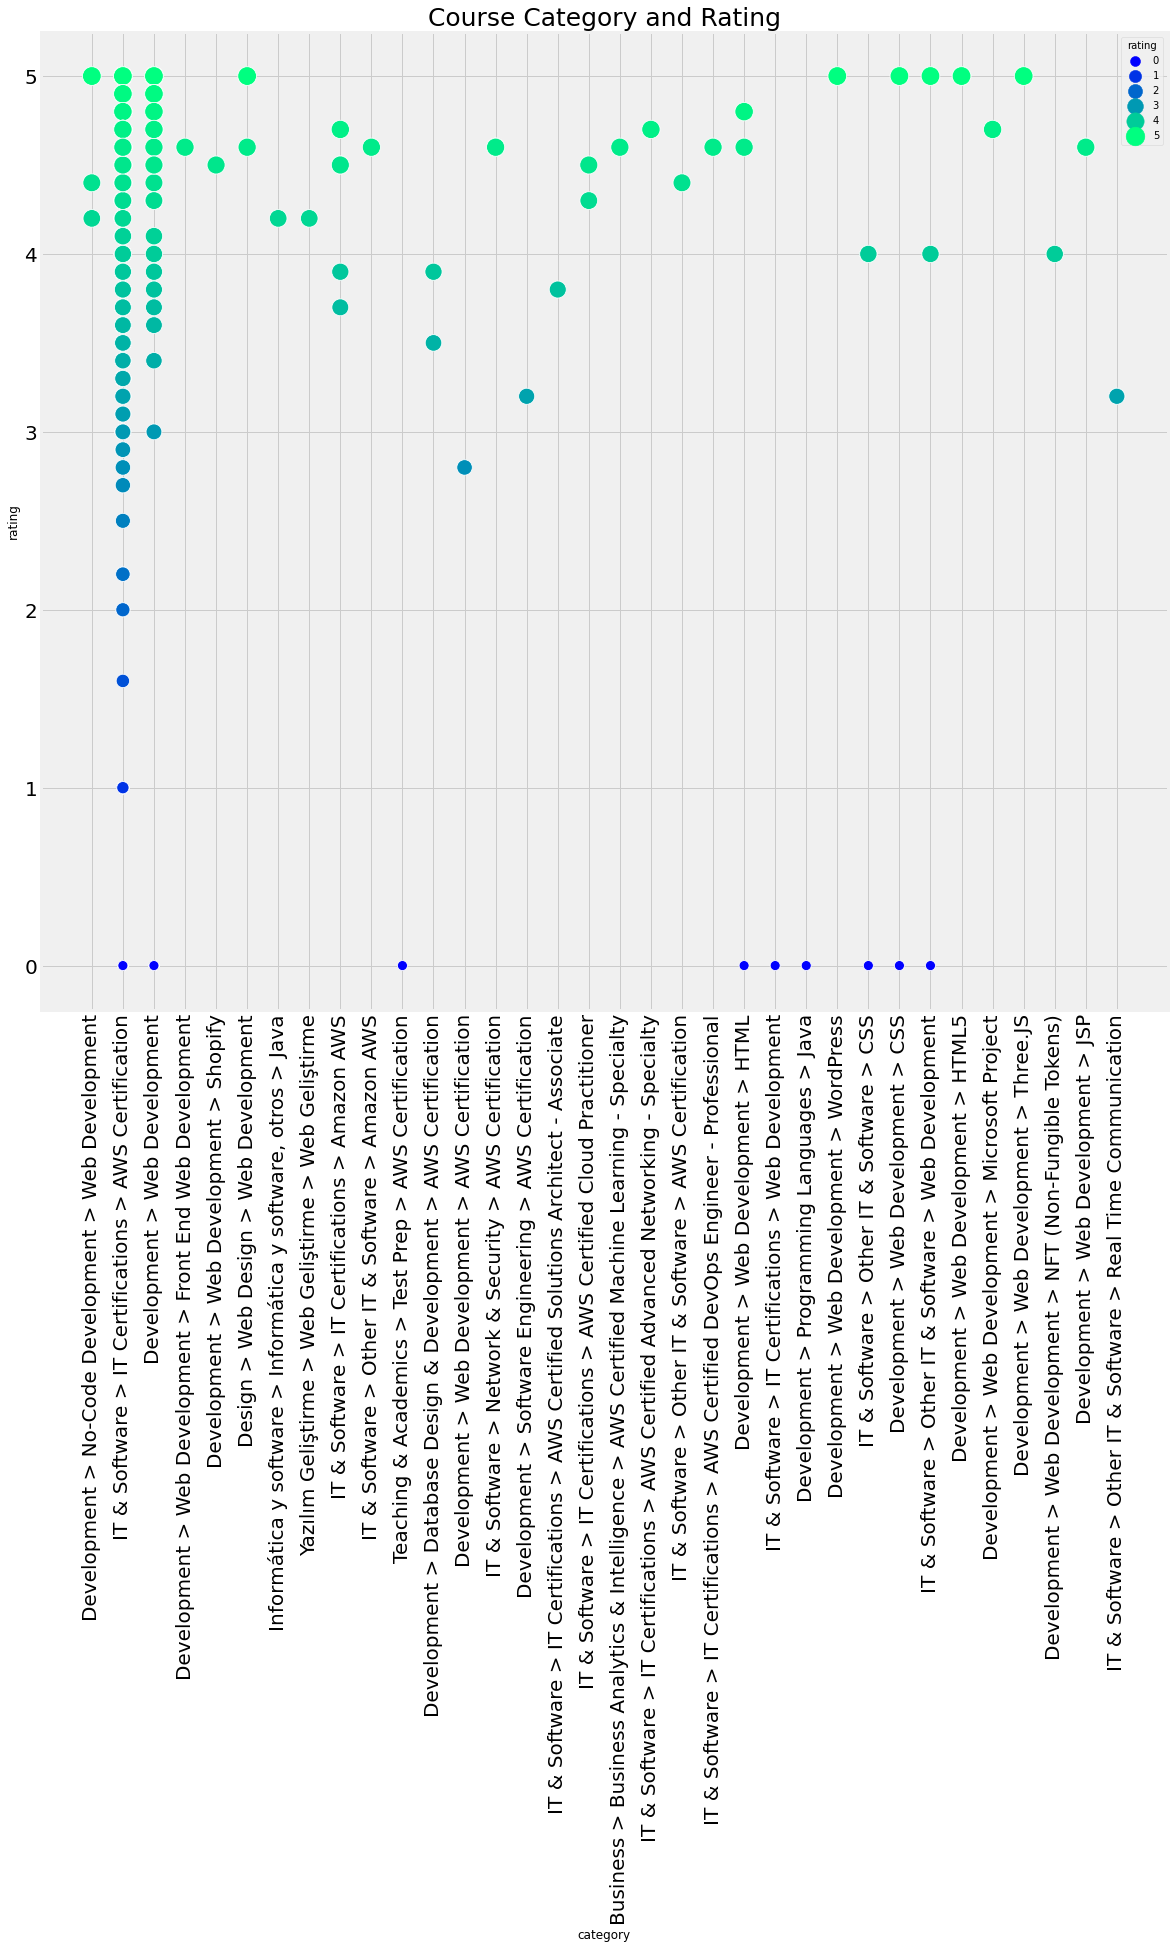

In [15]:
plt.figure(figsize=(18, 18))
sns.scatterplot(x = 'category', y = 'rating', hue = 'rating', palette= 'winter', size = 'rating', sizes = (100, 350), data = df)
plt.xticks(rotation='vertical', fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("Course Category and Rating",fontsize=25)
plt.show()

From the above graph, we can conclude that the category: **"AWS Certification"** has a great variation of rating But this is normal as this category also has maximum amount of courses. so, that's why category has also maximum amount of variation within rating.

#### **Finding out relation between course Category and Price:**

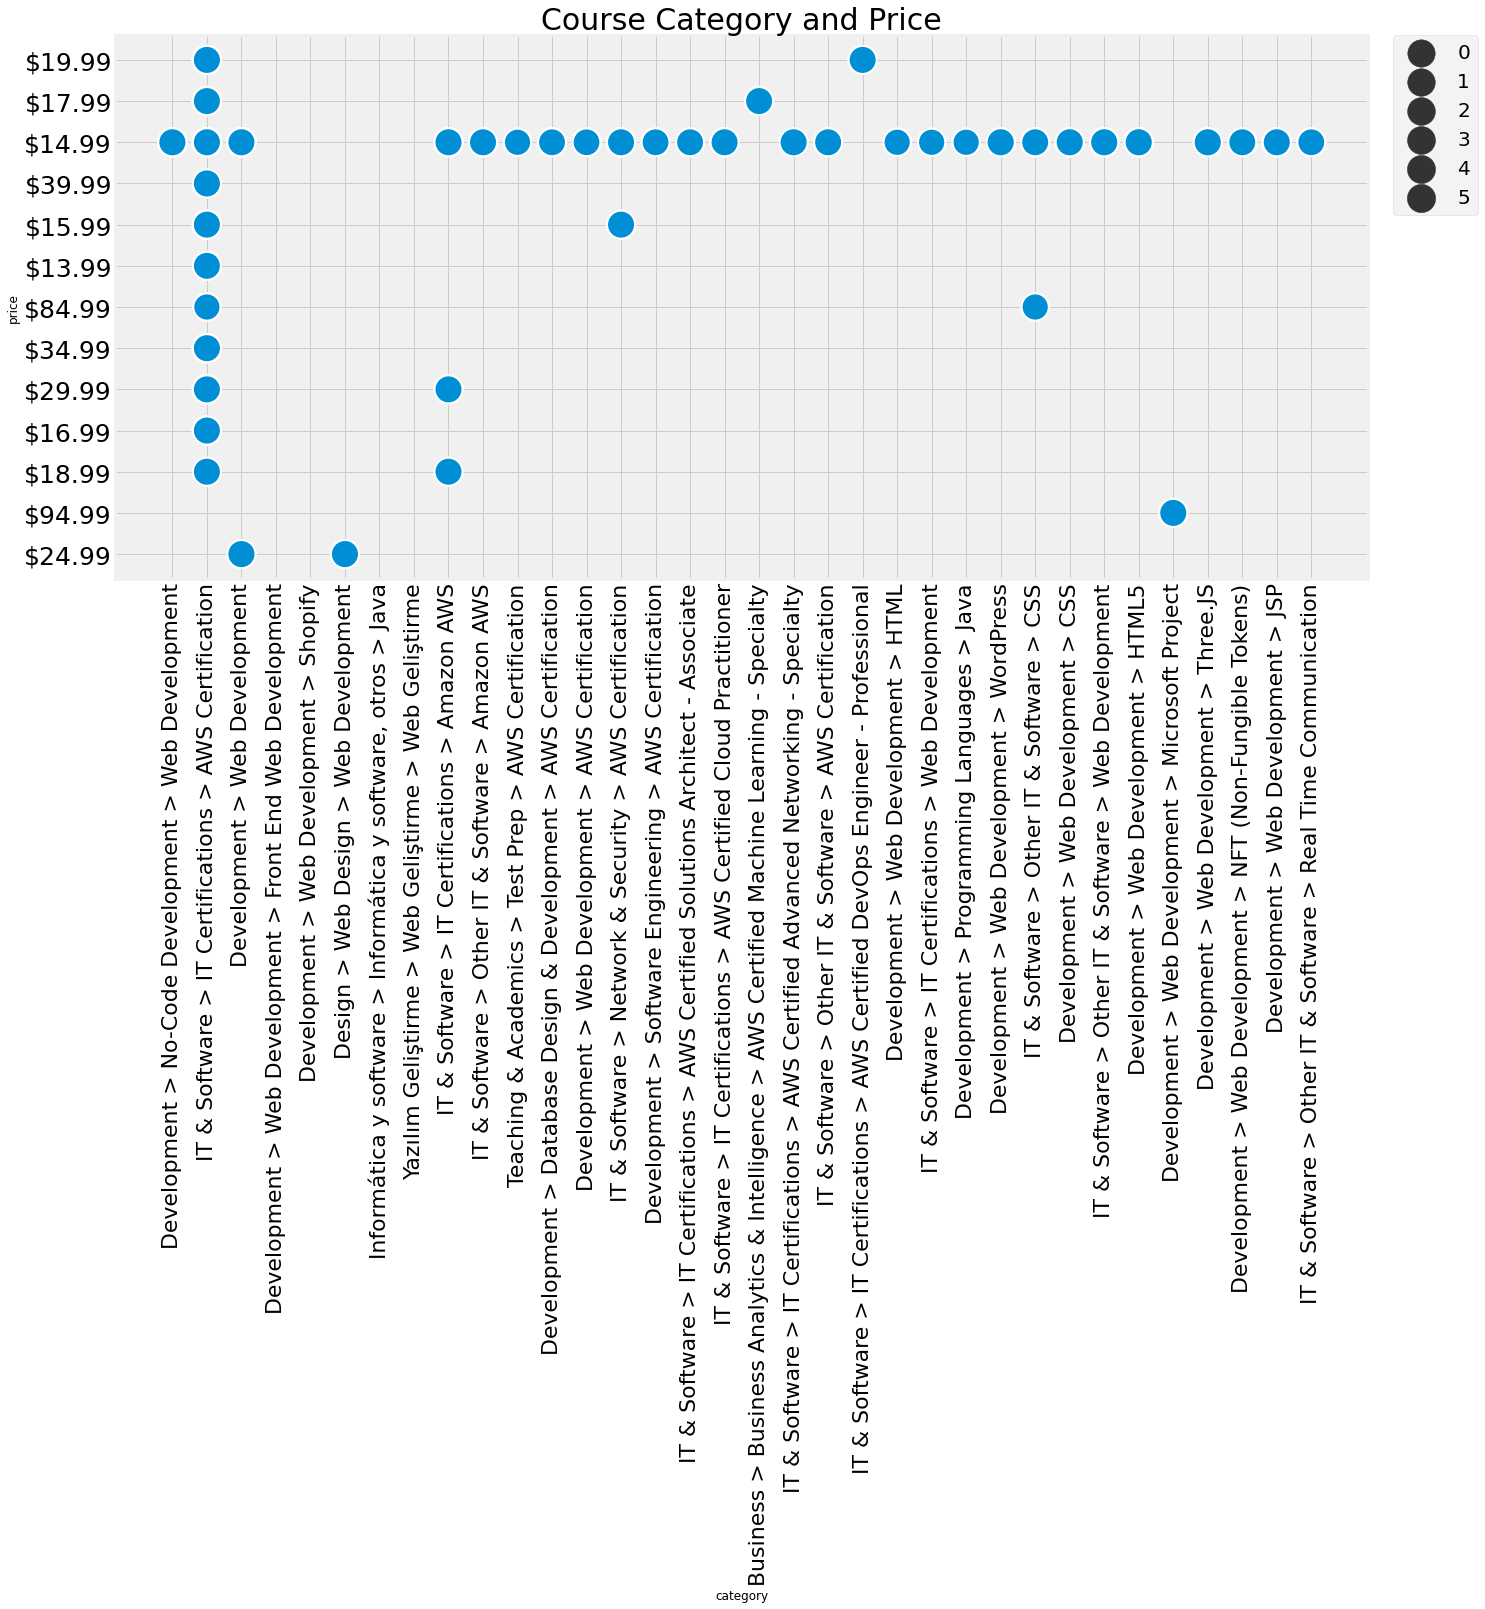

In [16]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x = 'category', y = 'price', palette= 'winter', size = 'rating', sizes = (750, 800), data = df)
plt.xticks(rotation='vertical', fontsize = 22)
plt.yticks(fontsize = 25)
plt.title("Course Category and Price",fontsize=30)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, prop={'size': 20}) # Location of legend
plt.show()

Category: "AWS Certification" also varies greatly in price. 

From above graph also it is clear that most common price is $14.99 for all category of courses.

#### **Finding out relation between course Category and Duration of Video:**

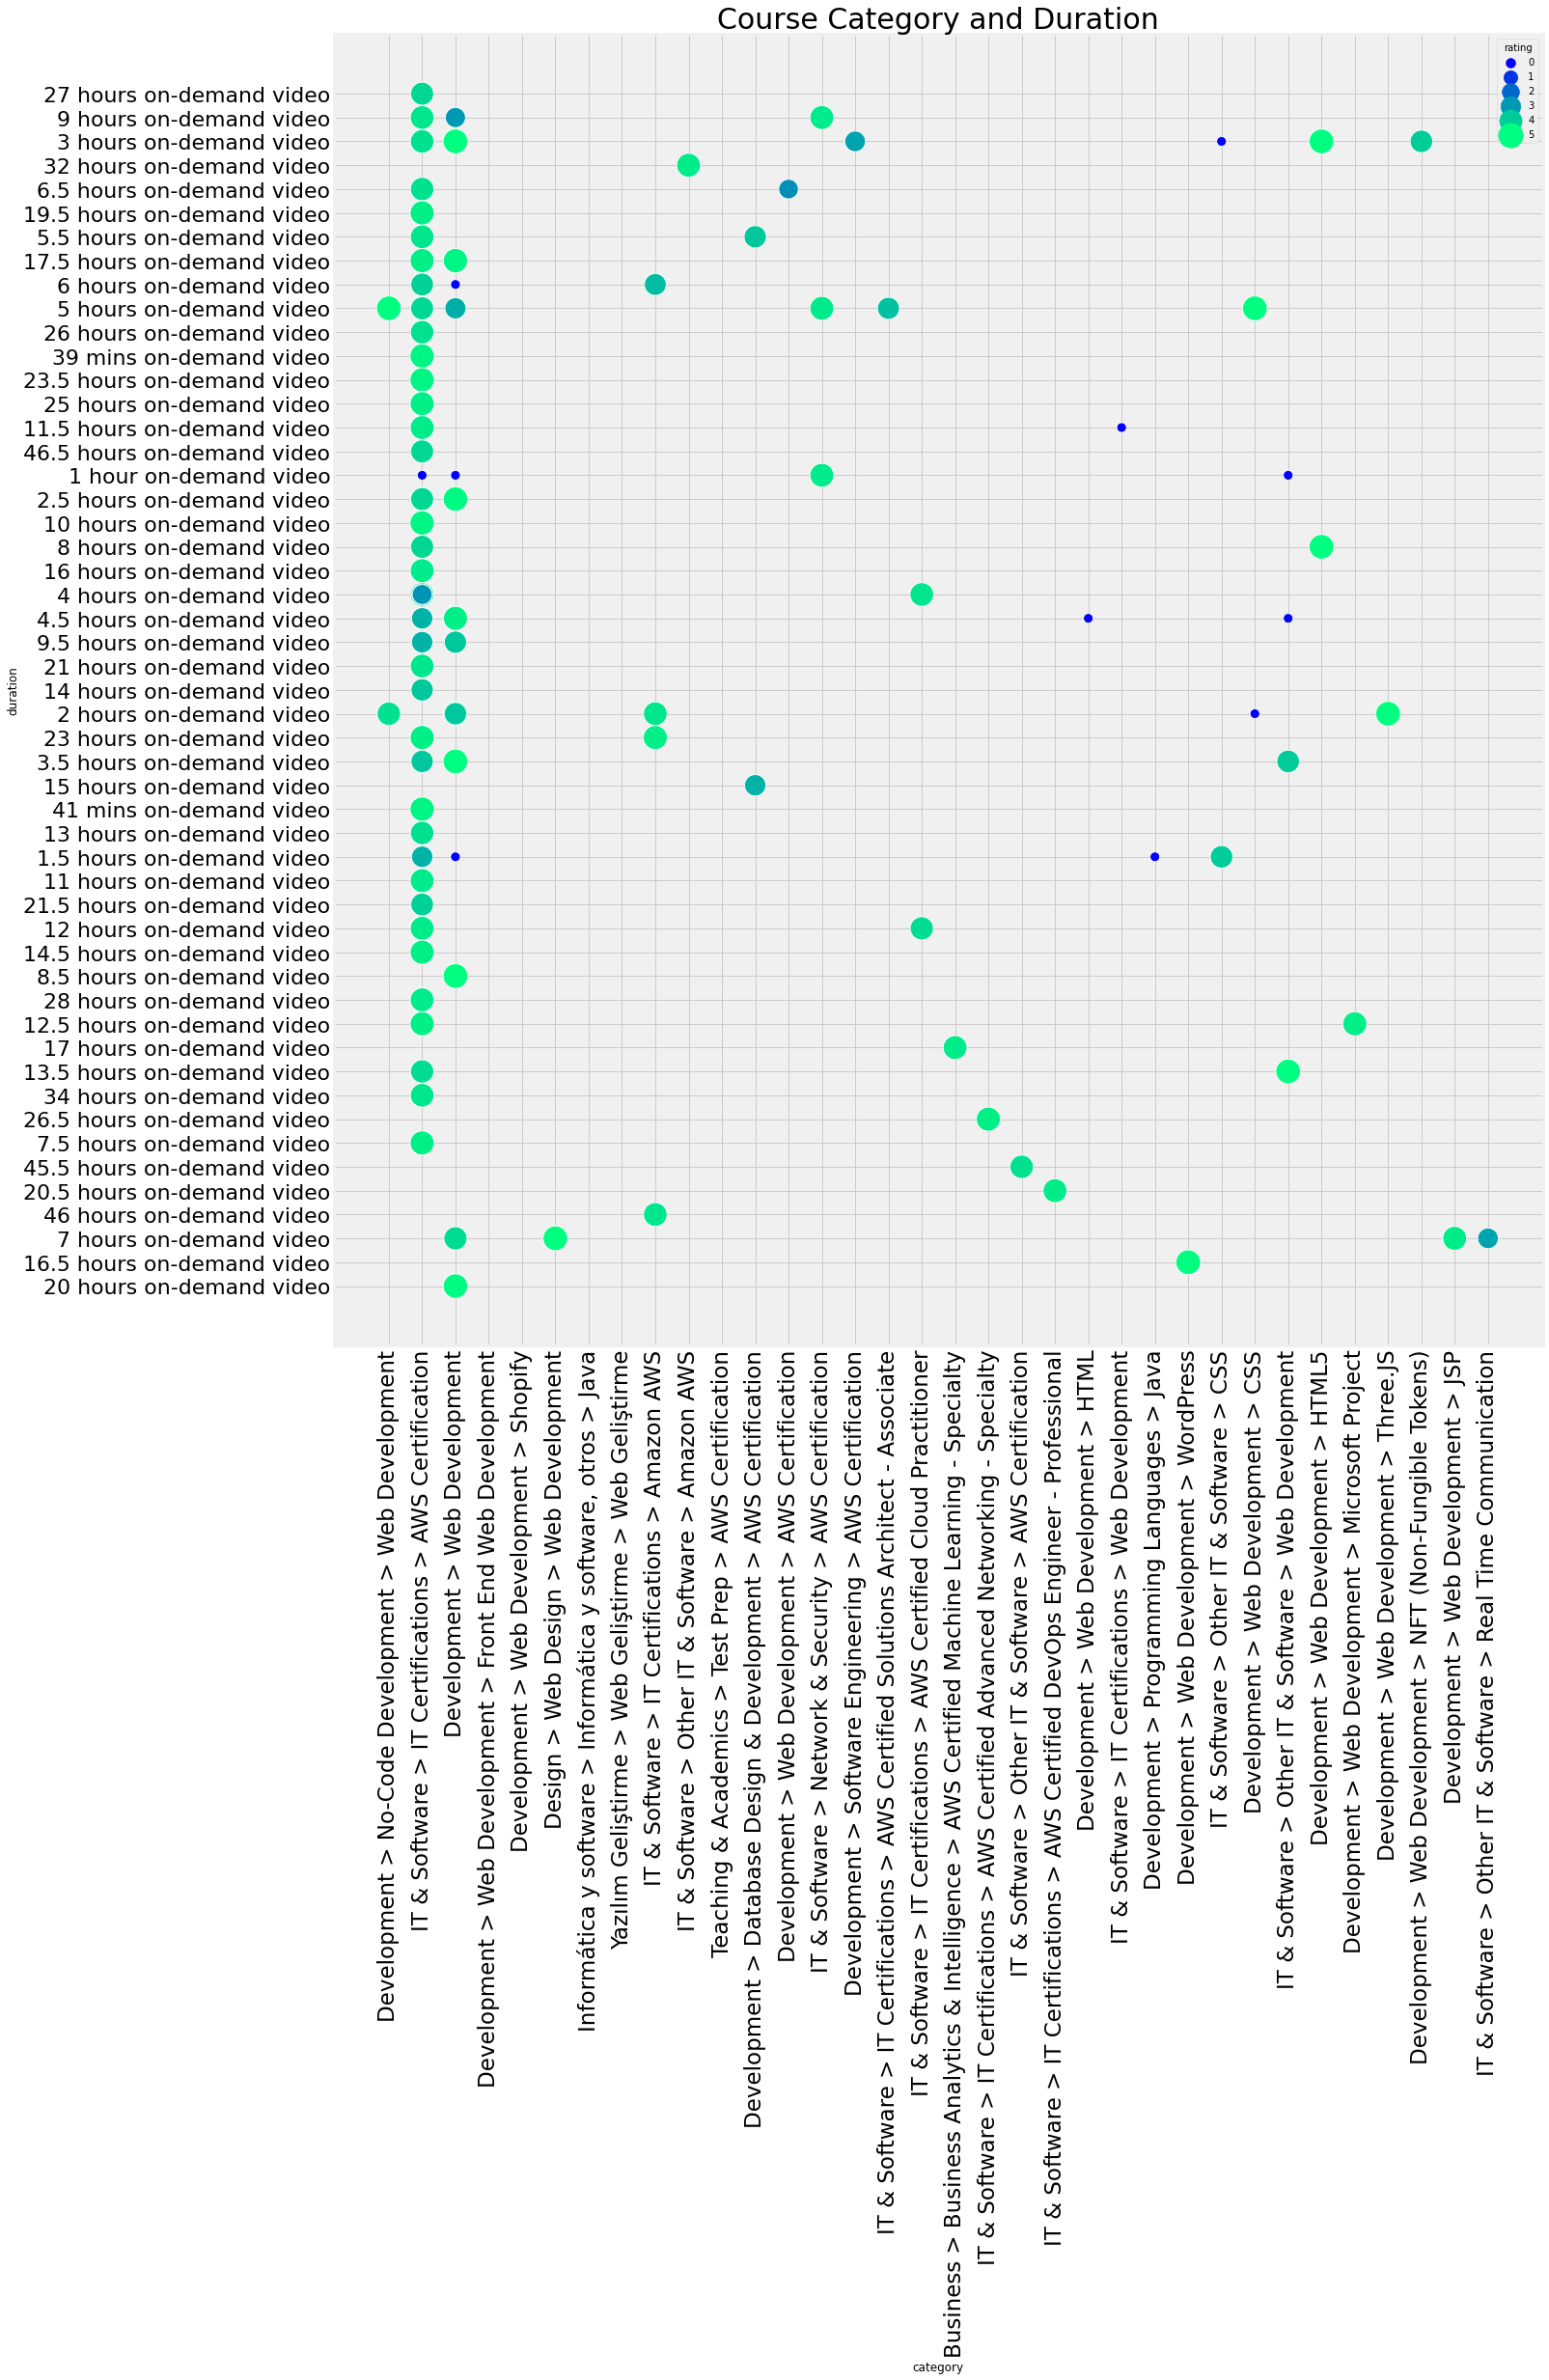

In [17]:
plt.figure(figsize=(20, 25))
sns.scatterplot(x = 'category', y = 'duration', hue = 'rating', palette= 'winter', size = 'rating', sizes = (100, 650), data = df)
plt.xticks(rotation='vertical', fontsize = 23)
plt.yticks(fontsize = 22)
plt.title("Course Category and Duration",fontsize=30)
plt.show()

Category: "AWS Certification" also show great variation for duration of video.

But one thing to note here is that courses contining 1 hour duration video has more 0 rating than any other duration video.

#### **Finding out relation between course Category and Language of Video:**

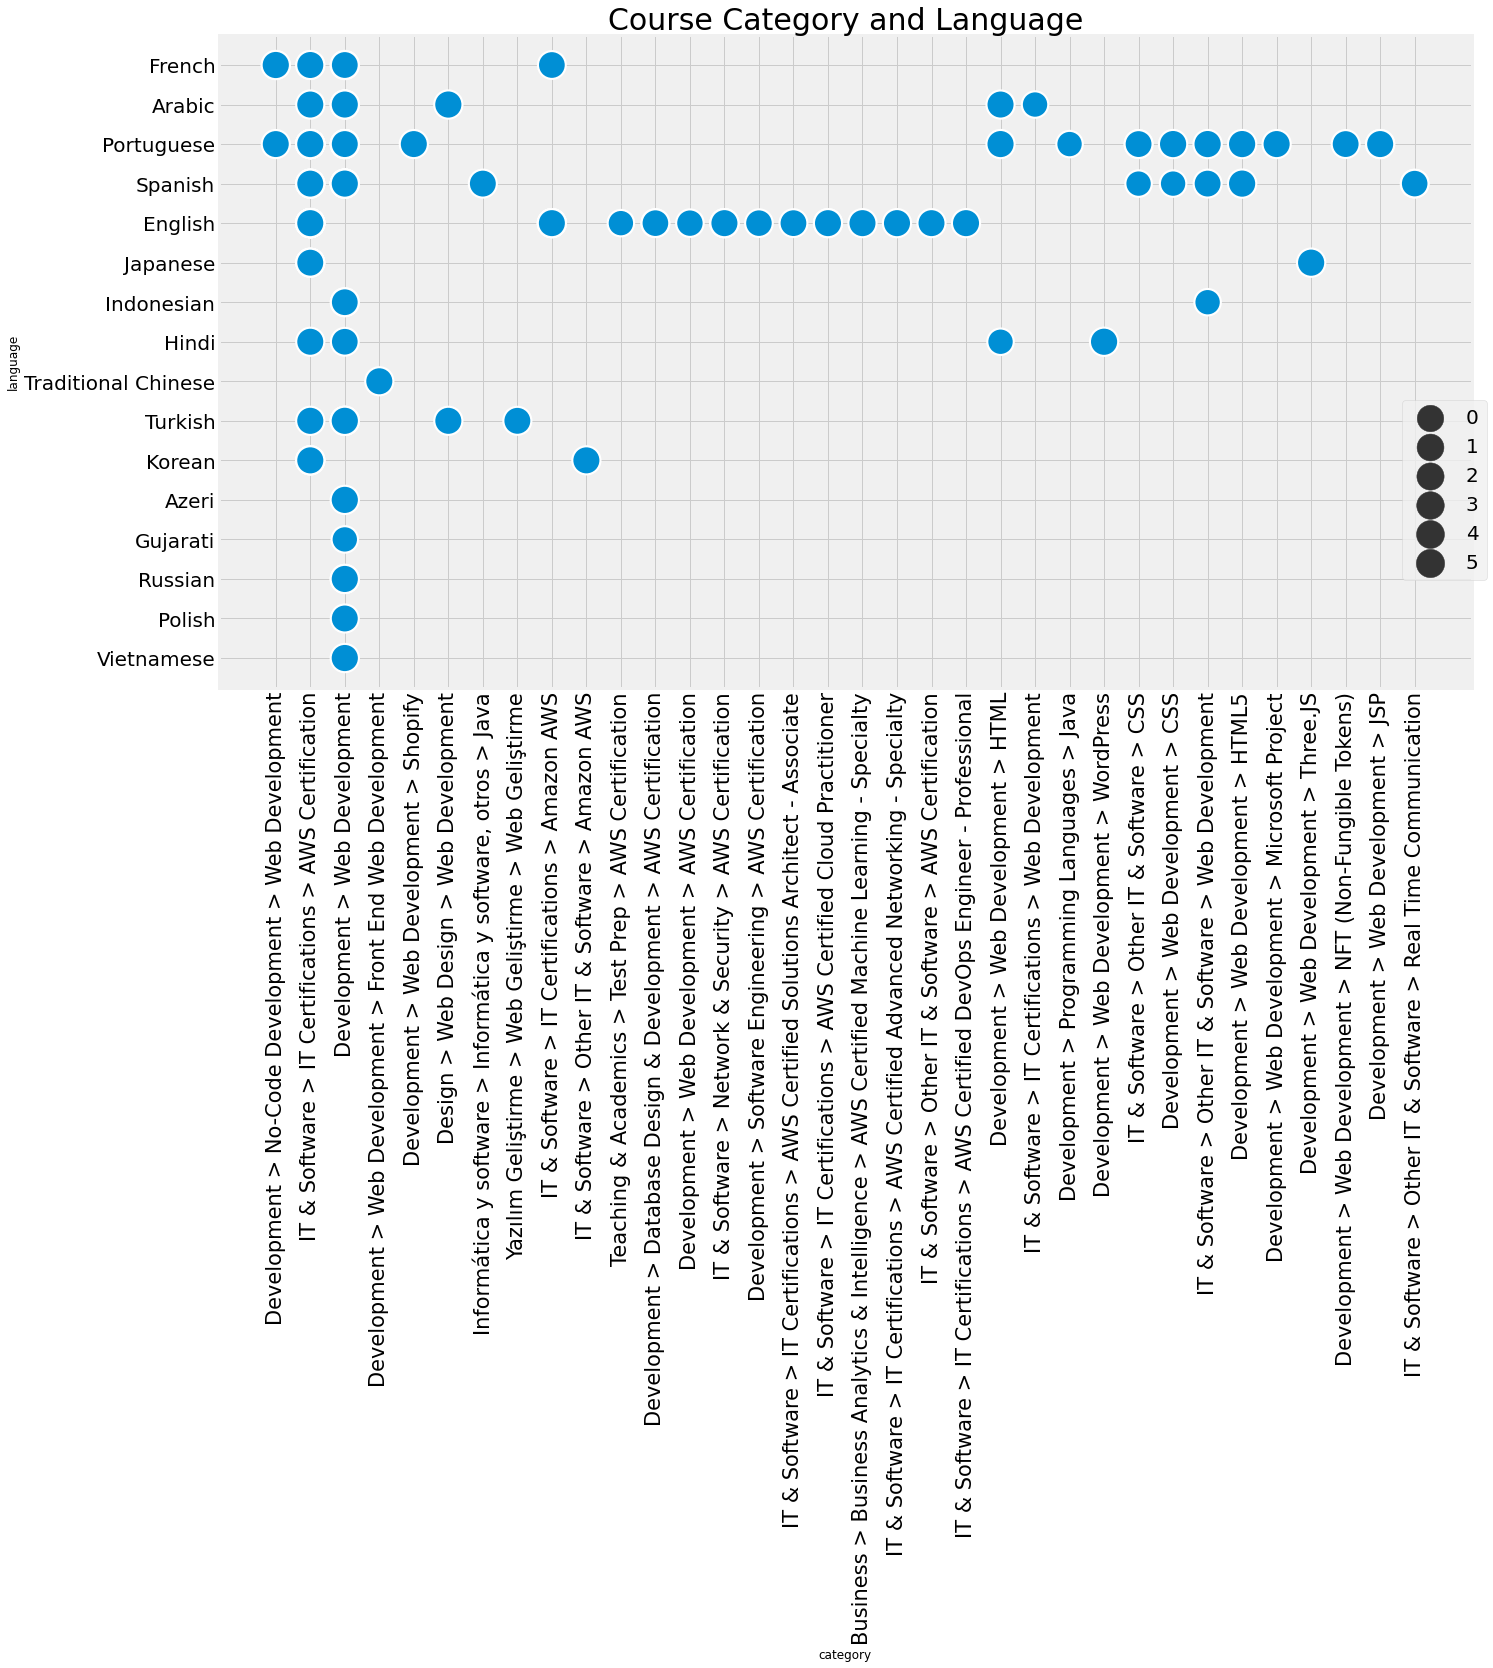

In [18]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x = 'category', y = 'language', size = 'rating', sizes = (700, 800), data = df)
plt.xticks(rotation='vertical', fontsize = 21)
plt.yticks(fontsize = 20)
plt.title("Course Category and Language",fontsize=30)
plt.legend(bbox_to_anchor=(1.02, 0.15), loc= 'lower right', prop={'size': 20})
plt.show()

Unlike any other graph. on this graph we can clearly see that the Category: "Web Development" is showing a great variation for the Language of course.

And, a range of courses such as HTML, HTML5 and CSS are available in the **Portuguese** and **Spanish** language.

#### **Finding out relation between course Points and Rating of Video:**

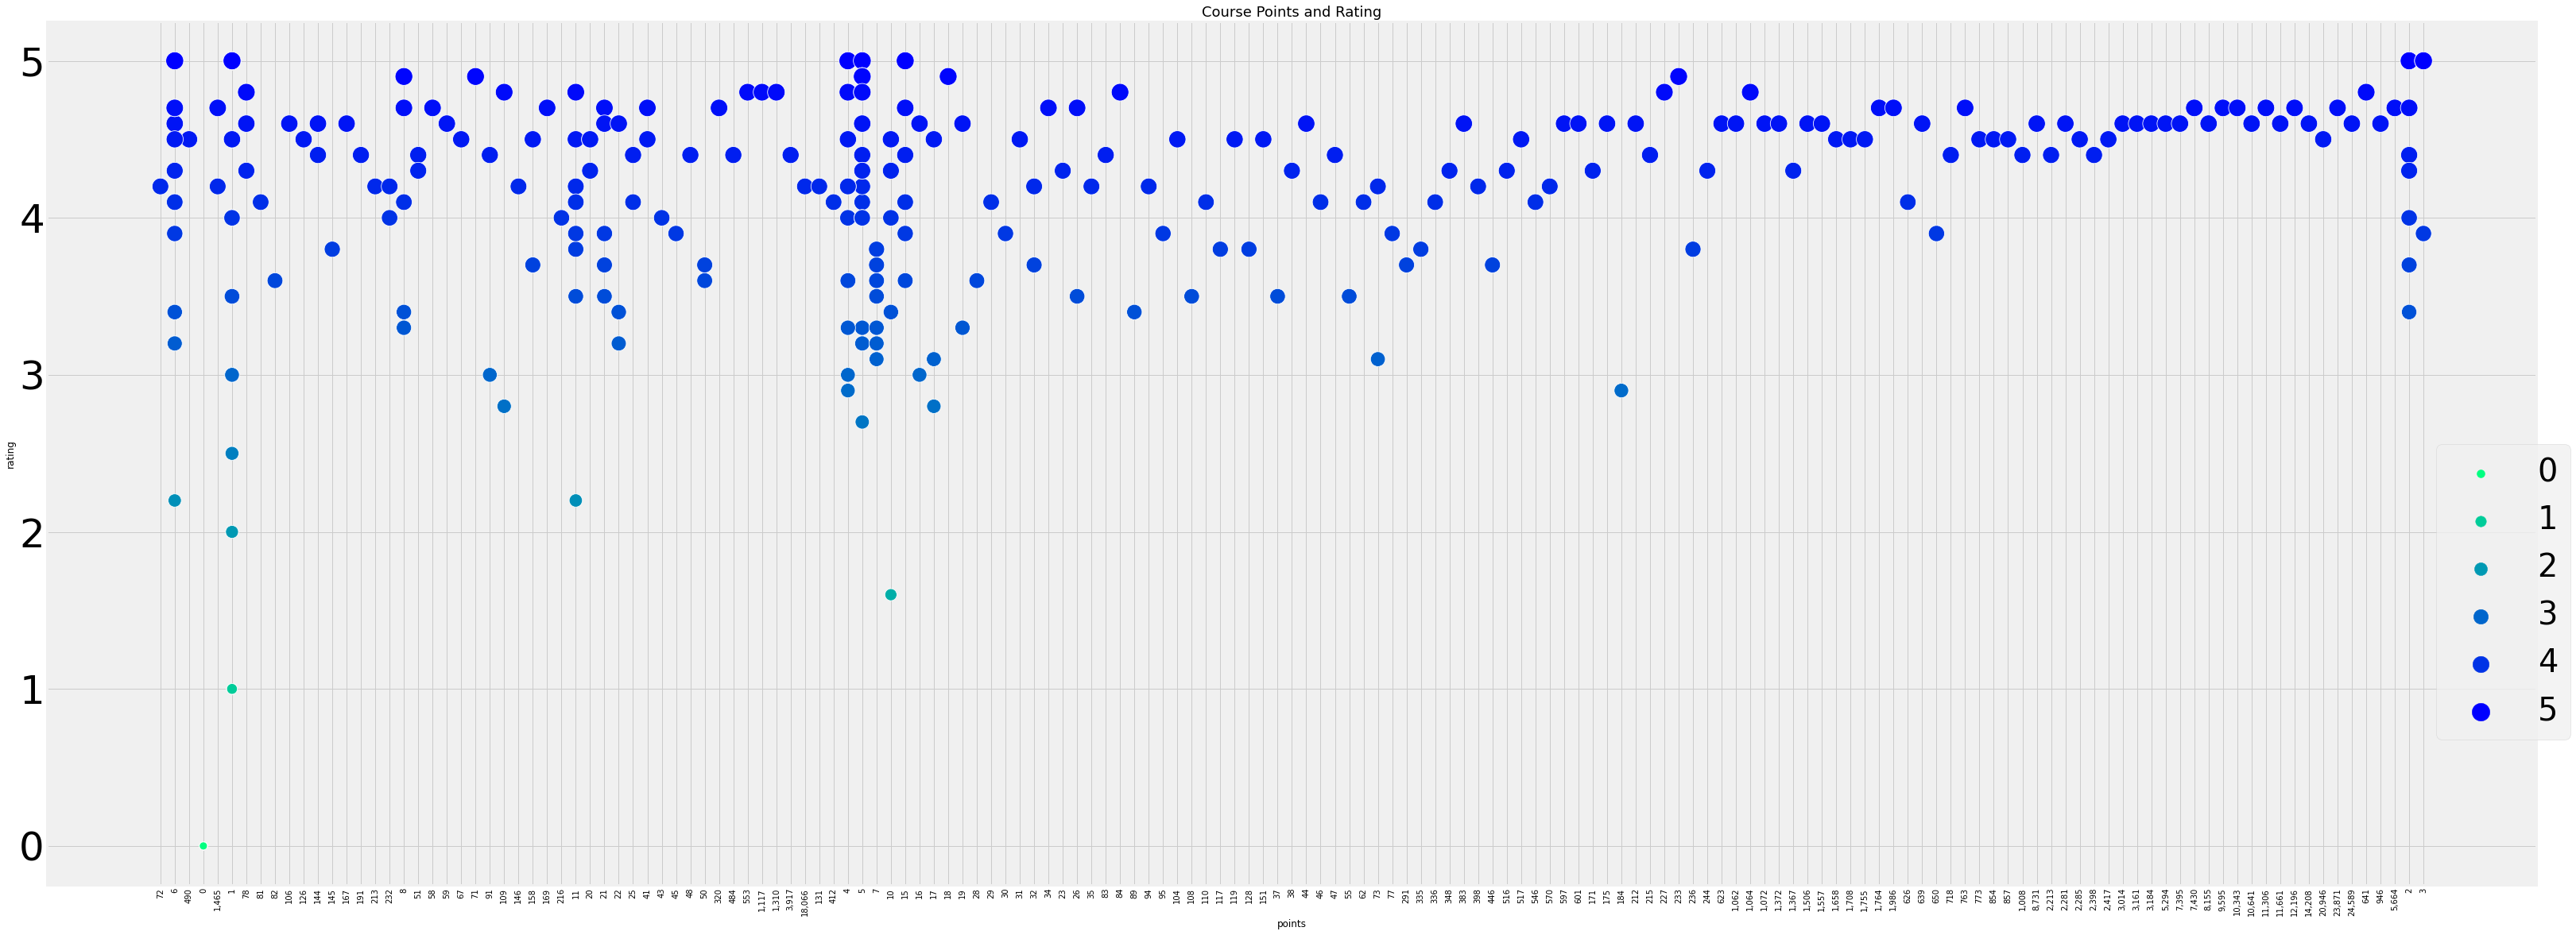

In [19]:
plt.figure(figsize=(50, 20))
sns.scatterplot(x = 'points', y = 'rating', palette= "winter_r", hue = 'rating', size = 'rating', sizes = (100, 500), data = df)
plt.xticks(rotation='vertical')
plt.yticks(fontsize = 50)
plt.title("Course Points and Rating",fontsize=18)
plt.legend(bbox_to_anchor=(1.02, 0.15), loc= 'lower right', prop={'size': 40})
plt.show()
# Double click to Zoom in.

Zoom in above to see the figure clearly.(Double click to Zoom)

#### **Finding out relation between Course Last_Update and Rating:**

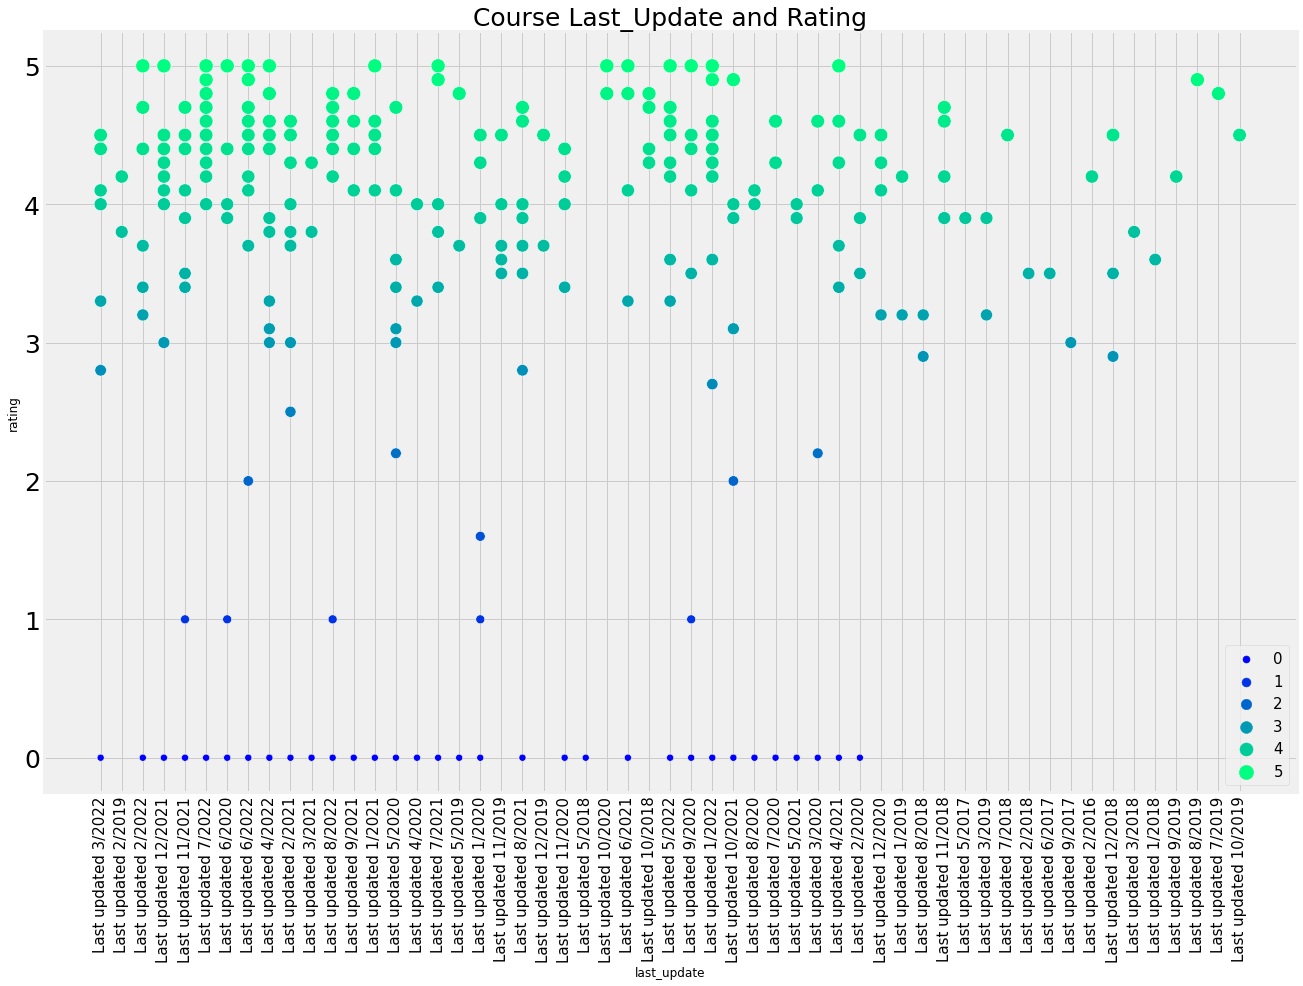

In [20]:
plt.figure(figsize=(20, 14))
sns.scatterplot(x = 'last_update', y = 'rating', hue = 'rating', palette= "winter", size = 'rating', sizes = (50, 200), data = df)
plt.xticks(rotation='vertical', fontsize = 15)
plt.yticks(fontsize = 25)
plt.title("Course Last_Update and Rating",fontsize=25)
plt.legend(loc=4, prop={'size': 15})
plt.show()

**According to me the above graph is the most important graph of this "multivariate Analysis" section**

You could observe that in each column containing last update 2022. The Rating is higher than in other years.

if somehow i would have combined every column according to their last update year. into a single column like 2017, 2018, 2019, 2020, 2021, 2022. Then it would be easy to see and visualize.

So, Let's do that:

### **We will do it with 'slice' method** 
#### **Preparining data for Slicing**

In [21]:
# checking for null values for df['last_update']
df['last_update'].isnull()

0       True
1       True
2       True
3      False
4      False
       ...  
461    False
462    False
463    False
464    False
465    False
Name: last_update, Length: 466, dtype: bool

In [22]:
# Dropping null values in df['last_update']
df.dropna(subset=['last_update'], inplace = True)

In [23]:
# checking for null values after dropping for df['last_update']
df['last_update'].isnull()

3      False
4      False
5      False
6      False
7      False
       ...  
461    False
462    False
463    False
464    False
465    False
Name: last_update, Length: 443, dtype: bool

All null values are dropped. Now, Our full sentence('Last updated 2/2022') is ready to be sliced into Year('2022') only

In [24]:
# Making an empty list to store all the sliced elements into this new list
last_update_year= []

In [25]:
# Actual Part is Here
for i in df['last_update']:
    word_splitted = i.split() # splitting the whole sentence into words: e.g., 'Last updated 2/2022' --> ['Last', 'updated', '2/2022'] 
    date_splitted = word_splitted[2].split('/') # splitting the the date into month and year e.g., '2/2022' --> ['2', '2022']
    j = date_splitted[1] # Storing the Year Part on variable 'j'
    last_update_year.append(j) # appending j as a element inside an empty list 'last_update_year'

# This is how our new list looks like:    
print(last_update_year)


['2022', '2019', '2022', '2021', '2021', '2022', '2020', '2022', '2022', '2022', '2022', '2021', '2022', '2021', '2022', '2022', '2022', '2022', '2021', '2022', '2021', '2020', '2020', '2022', '2021', '2019', '2020', '2021', '2022', '2022', '2019', '2021', '2020', '2022', '2019', '2022', '2021', '2022', '2021', '2022', '2020', '2020', '2018', '2020', '2022', '2022', '2022', '2020', '2021', '2022', '2018', '2022', '2022', '2022', '2022', '2022', '2020', '2022', '2022', '2022', '2022', '2021', '2021', '2021', '2022', '2021', '2022', '2022', '2020', '2020', '2020', '2020', '2020', '2021', '2021', '2022', '2022', '2022', '2022', '2022', '2022', '2021', '2022', '2021', '2022', '2021', '2022', '2022', '2021', '2021', '2020', '2021', '2021', '2022', '2022', '2020', '2020', '2021', '2022', '2020', '2020', '2021', '2020', '2021', '2021', '2022', '2021', '2021', '2022', '2021', '2021', '2022', '2022', '2021', '2020', '2022', '2022', '2022', '2022', '2022', '2021', '2021', '2020', '2020', '2021',

#### **Lets add a new column in dataframe using the new list just created** 

In [26]:
# Creating a new column 'Update_Year' using 'last_update_year' list 
df['Update_Year'] = last_update_year

#### **Have a Look at our new DataFrame:** 

In [27]:
df.sample(2)

,category,title,short_decs,rating,student_num,points,creator,language,last_update,price,duration,long_desc,url,Update_Year
191,IT & Software > IT Certifications > AWS Certif...,AWS Certified SysOps Administrator Associate P...,Feel confident and Get AWS SysOps Administrato...,5.0,"2,001 students",1,AFAQ Formations,English,Last updated 1/2022,$14.99,NaN,What Exactly Is Certification?. Certification ...,https://www.udemy.com/course/aws-certified-sys...,2022
298,IT & Software > IT Certifications > AWS Certif...,AWS Certified Cloud practitioner - Full Course...,AWS Certified Cloud practitioner - Essentials ...,4.8,98 students,84,Hariharamoorthi Saminathan,English,Last updated 4/2022,$14.99,41 mins on-demand video,Amazon Web Services (AWS) is a comprehensive c...,https://www.udemy.com/course/aws-certified-clo...,2022


In [28]:
# comparing our new column 'Update_Year' with 'last_update' column
df[['last_update', 'Update_Year']]

,last_update,Update_Year
3,Last updated 3/2022,2022
4,Last updated 2/2019,2019
5,Last updated 2/2022,2022
6,Last updated 12/2021,2021
7,Last updated 11/2021,2021
...,...,...
461,Last updated 8/2022,2022
462,Last updated 8/2021,2021
463,Last updated 7/2020,2020
464,Last updated 8/2021,2021


## **Now, Finally Visualize**

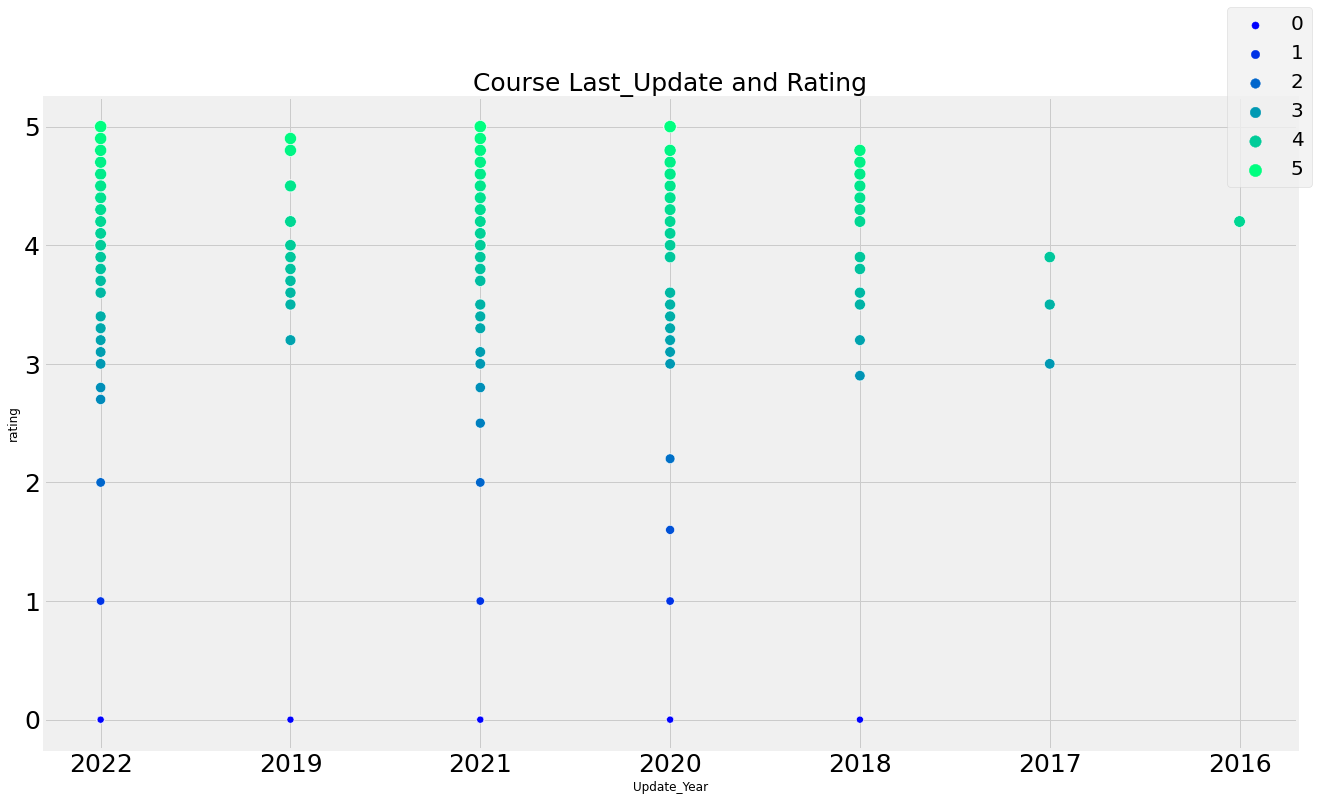

In [29]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x = 'Update_Year', y = 'rating', hue = 'rating', palette= "winter", size = 'rating', sizes = (50, 150), data = df)
plt.title("Course Last_Update and Rating",fontsize=25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(bbox_to_anchor=(1.02, 1), loc='center right', prop={'size': 20})
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



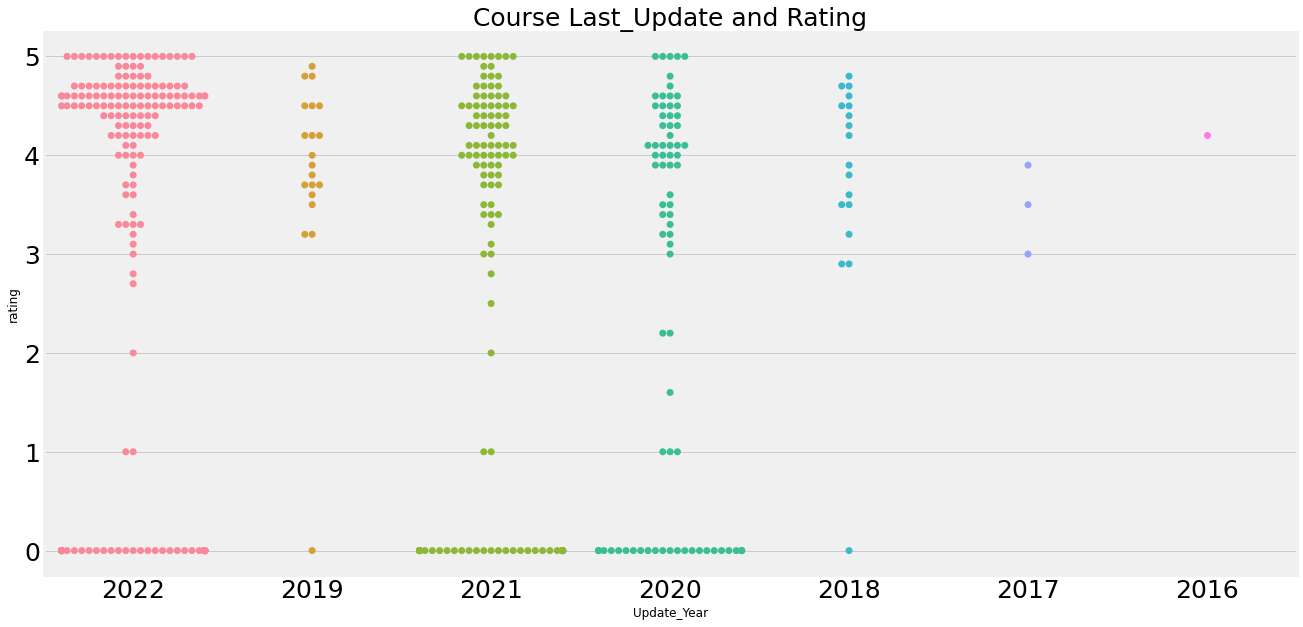

In [30]:
# checking the distribution more clearly
plt.figure(figsize=(20, 10))
sns.swarmplot(data = df, x = 'Update_Year', y = 'rating', size = 7)
plt.title("Course Last_Update and Rating",fontsize=25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.show()

Now, You could easily observe that the rating is higher for each course which got an update in Year 2022 in comparison to other courses which have not updated for years.


#### **Thanks a lot for having a look at this notebook. If you found this notebook useful, consider ✨**Upvoting**✨**, 

##### **If you have any idea/suggestions about this notebook, please leave a comment!**

##### **Thank you all for your reading and support!**
##### **HAPPY LEARNING :)**